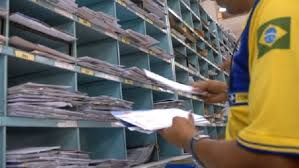
# Nova seção
Carteiro leitor de CEP


In [4]:
# Importando bibliotecas padroes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Importando biblioteca de dados
from tensorflow.keras.datasets import mnist

In [6]:
# Carregando dados
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


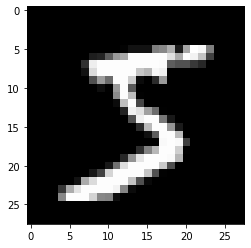

In [7]:
# Verificando imagem
%matplotlib inline

# Imprimento imagem escala de cinza
plt.imshow(train_images[0], cmap="gray")
plt.show()

In [8]:
# Verificando tamanho do dados de treino
train_images.shape

(60000, 28, 28)

In [9]:
# Quais os unicos valores classificados no labels treino
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
# Verificando tamanho dos dados de teste
test_images.shape

(10000, 28, 28)

In [11]:
# Quais os unicos valores classificados no labels de teste
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
# Transformando imagem em uma linha
train_images = train_images.reshape((60000, 28 * 28))
test_images  = test_images.reshape((10000, 28 * 28))

In [13]:
# Normalizando dados 
train_images = train_images.astype("float32") / 255
test_images  = test_images.astype("float32")  / 255

In [14]:
# Categorizando One Hot Encoder
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

In [15]:
# Iniciando processo de apredizagem tensorflow
# Importando bibliotecas necessarias
from tensorflow.keras import models, layers

model = models.Sequential()

model.add(layers.Dense(32, activation='sigmoid',input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Criando copilador Keras
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"]
              )

In [18]:
model.fit(train_images,train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.8642 - accuracy: 0.8229
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3452 - accuracy: 0.9110
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2690 - accuracy: 0.9259
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2331 - accuracy: 0.9342
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2099 - accuracy: 0.9403
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1925 - accuracy: 0.9445
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1789 - accuracy: 0.9486
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1677 - accuracy: 0.9524
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1585 - accuracy: 0.9544
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1506 - accuracy: 0.9569

In [19]:
# Verificando Acuracia
test_loss, test_acc = model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1583 - accuracy: 0.9525


In [21]:
print("test_acc:", test_acc)

test_acc: 0.9524999856948853


In [23]:
model.save("Carteiro.h5")